In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import os,sys,inspect

current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir)
import edhec_risk_kit as erk

import ipywidgets as widgets
from IPython.display import display

In [3]:
erk.bond_price(5, 100, .05, 12, .03)

0    109.275393
dtype: float64

In [7]:
rates, zc_prices = erk.cir(10, 500, b=0.03, r_0=0.03)

In [9]:
erk.bond_price(5, 100, .05, 12, rates.iloc[0][[1, 2, 3]])

1    109.275393
2    109.275393
3    109.275393
dtype: float64

In [10]:
erk.bond_price(5, 100, .05, 12, rates.iloc[1][[1, 2, 3]])

1    109.619909
2    109.868358
3    110.289222
dtype: float64

In [12]:
rates[[1,2,3]].head()

,1,2,3
0,0.030000,0.030000,0.030000
1,0.029293,0.028785,0.027927
2,0.030130,0.028276,0.033329
3,0.029935,0.028595,0.034761
4,0.035046,0.025809,0.032855


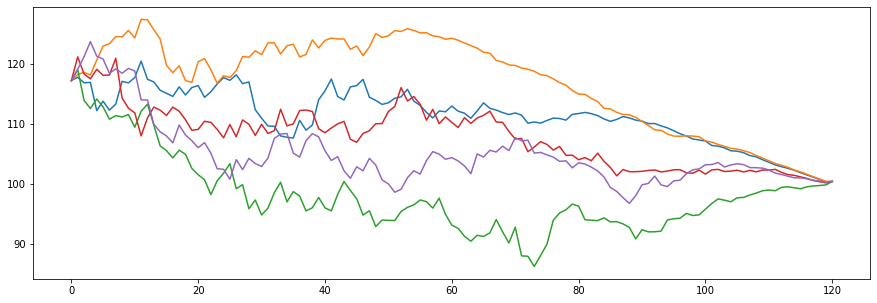

In [15]:
erk.bond_price(10, 100, .05, 12, rates[[1, 2, 3, 4, 5]]).plot(legend=False, figsize=(15,5))

In [16]:
prices = erk.bond_price(10, 100, .05, 12, rates[[1, 2, 3, 4, 5]])
prices

,1,2,3,4,5
0,117.26,117.26,117.26,117.26,117.26
1,117.802,118.283,119.1,121.212,119.174
2,116.892,118.63,113.961,118.38,121.236
3,116.949,118.194,112.586,117.545,123.765
4,112.247,120.676,114.183,119.143,121.34
...,...,...,...,...,...
116,101.491,101.613,99.5133,100.915,100.852
117,101.129,101.207,99.6606,100.568,100.617
118,100.753,100.818,99.7294,100.368,100.47
119,100.364,100.409,99.8368,100.175,100.241


In [17]:
br = prices.pct_change().dropna()
erk.annualize_rets(br, 12) # this is wrong, this is a change of prices, not returns

1   -0.015387
2   -0.015387
3   -0.015387
4   -0.015387
5   -0.015387
dtype: float64

In [20]:
prices = erk.bond_price(10, 100, .05, 12, rates[[1, 2, 3, 4]])
btr = erk.bond_total_return(prices, 100, .05, 12)
erk.annualize_rets(btr, 12)

1    0.029844
2    0.027765
3    0.036247
4    0.031339
dtype: float64

In [30]:
price_10 = erk.bond_price(10, 100, .05, 12, rates)
price_10[[1, 2, 3]].tail()a

,1,2,3
116,101.491,101.613,99.5133
117,101.129,101.207,99.6606
118,100.753,100.818,99.7294
119,100.364,100.409,99.8368
120,100.417,100.417,100.417


In [31]:
price_30 = erk.bond_price(30, 100, .05, 12, rates)
price_30[[1, 2, 3]].tail()

,1,2,3
116,186.388,196.85,83.2999
117,187.221,196.165,84.4114
118,186.9,198.146,81.8269
119,182.512,197.575,78.7353
120,187.634,196.424,79.6873


In [32]:
rets_30 = erk.bond_total_return(price_30, 100, .05, 12)
rets_10 = erk.bond_total_return(price_10, 100, .05, 12)
rets_bonds = .6 * rets_10 + .4 * rets_30

In [33]:
mean_rets_bond = rets_bonds.mean(axis='columns')
erk.summary_stats(pd.DataFrame(mean_rets_bond))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.036035,0.003388,0.461305,3.981401,-0.001504,-0.00107,1.733443,0.0


In [34]:
price_eq = erk.gbm(n_years=10, n_scenarios=500, mu=.07, sigma=.15)
price_eq.shape

(121, 500)

In [35]:
rets_eq = price_eq.pct_change().dropna()
rets_eq.shape

(120, 500)

In [36]:
rets = .7*rets_eq + .3*rets_bonds
rets_mean = rets.mean(axis='columns')
erk.summary_stats(pd.DataFrame(rets_mean))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.057575,0.005356,-0.179239,2.770494,-0.00206,-0.001384,5.011202,0.0
